## First Ever Python project
### (as can be seen from my style of coding)

Credits: Since this project was for IBM DS Specialization, some functions have been taken from the labs.

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [3]:
page = requests.get("https://en.wikipedia.org/wiki/Temperature_in_Canada")
soup = BeautifulSoup(page.content, 'html.parser')
myTable = soup.find('table',{'class':'wikitable sortable'})
myTable1 = myTable.findAll('td')

myData = []

for rows in myTable1:
    myData.append(rows.get_text())

myData = np.array(myData)
myData = myData.T

In [4]:
df = pd.DataFrame()
community = myData[::10] 
df['Community']=community

location = myData[2::10] 
df['Location']=location

elevation = myData[3::10] 
df['Elevation']=elevation

avgHigh = myData[8::10] 
df['Average High']=avgHigh

avgLow = myData[9::10] 
df['Average Low']=avgLow


df = df.replace('\n','', regex=True)

df[['Community','ExtraComm']] = df.pop('Community').str.split('[', expand=True)
df[['Community','ExtraComm1']] = df.pop('Community').str.split(', ', expand=True)
df[['Elevation','ExtraElev']] = df.pop('Elevation').str.split(' ', expand=True)
df[['Average High','ExtraH']] = df.pop('Average High').str.split(' ', expand=True)
df[['Average Low','ExtraL']] = df.pop('Average Low').str.split(' ', expand=True)
df[['Location','ExtraLoc','ExL']] = df.pop('Location').str.split(' / ', expand=True)
df[['Latitude','ExtraLoc']] = df.pop('ExL').str.split(';', expand=True)
df[['Longitude','ExtraLoc']] = df.pop('ExtraLoc').str.split(' \(', expand=True)



df = df.drop('ExtraLoc',axis = 1)
df = df.drop('ExtraComm',axis = 1)
df = df.drop('ExtraComm1',axis = 1)
df = df.drop('ExtraElev',axis = 1)
df = df.drop('ExtraH',axis = 1)
df = df.drop('ExtraL',axis = 1)
df = df.drop('Location',axis = 1)


df['Elevation'] = df['Elevation'].replace('m','', regex=True)
df['Elevation'] = df['Elevation'].replace(' ','', regex=True)
df['Elevation'] = df['Elevation'].replace(',','', regex=True)
df['Longitude'] = df['Longitude'].replace('\ufeff','', regex=True)


df['Elevation'] = df['Elevation'].str.strip()
df['Longitude'] = df['Longitude'].str.strip()
df['Latitude'] = df['Latitude'].str.strip()
df['Average Low'] = df['Average Low'].str.strip()
df['Average High'] = df['Average High'].str.strip()


df["Elevation"] = pd.to_numeric(df["Elevation"])
df["Latitude"] = pd.to_numeric(df["Latitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])
df["Longitude"] = pd.to_numeric(df["Longitude"])
df['Average Low'] = df['Average Low'].str.replace('−', '-').astype(float)
df['Average High'] = df['Average High'].str.replace('−', '-').astype(float)

original_df = df.copy()
print("Dataframe has", df.size, "rows.")
df.head()

Dataframe has 258 rows.


,Community,Elevation,Average High,Average Low,Latitude,Longitude
0,Alberton,3.0,9.6,1.3,46.85000,-64.01667
1,Baker Lake,18.6,-7.3,-15.2,64.29889,-96.07778
2,Baie-Comeau,22.0,6.6,-3.3,49.13333,-68.20000
3,Calgary,1084.0,10.8,-1.9,51.11389,-114.02028
4,Charlottetown,49.0,9.9,1.3,46.28861,-63.12861


### Visualizing Weather Data

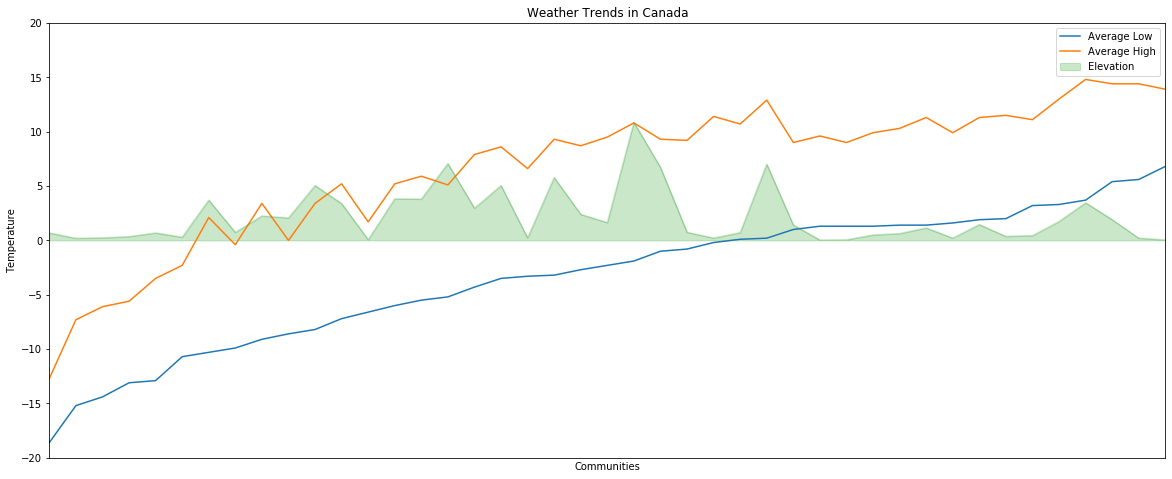

In [5]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


df = df.sort_values(['Average Low'],ascending = True)
plot1 = pd.DataFrame()
plot2 = pd.DataFrame()

plot1['Community'] = df['Community']
plot1['Average Low'] = df['Average Low']
plot1['Average High'] = df['Average High']
plot2['Community'] = df['Community']
plot2['Elevation'] = df['Elevation']/100

plot1.set_index(df['Community'],drop=True,inplace=True)
plot2.set_index(df['Community'],drop=True,inplace=True)


ax = plot1.plot(kind='line', figsize=(20, 8)) # pass a tuple (x, y) size
plot2.plot(ax=ax,kind='area',alpha = 0.25)
ax.set_ylim(-20,+20)

plt.xticks(range(0),plot1['Community'])

plt.title('Weather Trends in Canada')
plt.ylabel('Temperature')
plt.xlabel('Communities')

plt.show()

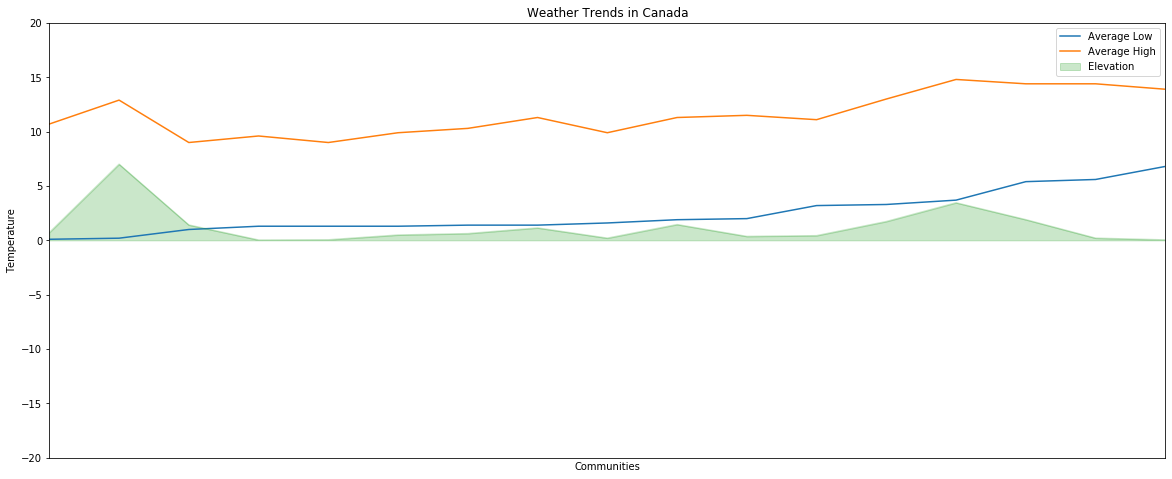

In [6]:
#Removing options where average low temperature falls bellow 0 degree celsius.

df = df[df['Average Low']>0]

plot1 = pd.DataFrame()
plot2 = pd.DataFrame()

plot1['Community'] = df['Community']
plot1['Average Low'] = df['Average Low']
plot1['Average High'] = df['Average High']
plot2['Community'] = df['Community']
plot2['Elevation'] = df['Elevation']/100

plot1.set_index(df['Community'],drop=True,inplace=True)
plot2.set_index(df['Community'],drop=True,inplace=True)


ax = plot1.plot(kind='line', alpha = 1,figsize=(20, 8)) # pass a tuple (x, y) size
plot2.plot(ax=ax,kind='area',alpha = 0.25)
ax.set_ylim(-20,+20)

plt.xticks(range(0),plot1['Community'])

plt.title('Weather Trends in Canada')
plt.ylabel('Temperature')
plt.xlabel('Communities')

plt.show()

<class 'bs4.element.ResultSet'>


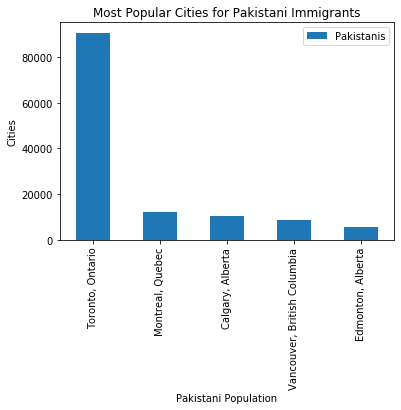

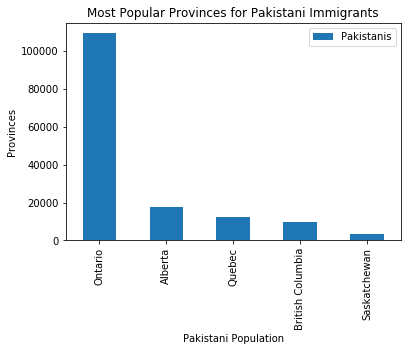

In [7]:
page2 = requests.get("https://en.wikipedia.org/wiki/Pakistani_Canadians")
page2.status_code

soup2 = BeautifulSoup(page2.content, 'html.parser')
pakTable = soup2.findAll('table',{'class':'wikitable'})
provTable = pakTable[0].findAll('td')
print(type(provTable))
provData = []
for prov in provTable:
    provData.append(prov.text)
provData = np.asarray(provData).T

prov_df = pd.DataFrame()
province = provData[::2] 
prov_df['Province']=province

prov_pak = provData[1::2] 
prov_df['Pakistanis']=prov_pak
prov_df = prov_df.replace('\n','', regex=True)

prov_df.head()

#City Data

cityTable = pakTable[1].findAll('td')
cityData = []
for city in cityTable:
    cityData.append(city.text)
cityData = np.asarray(cityData).T

city_df = pd.DataFrame()
city = cityData[::2] 
city_df['City']=city

city_pak = cityData[1::2] 
city_df['Pakistanis']=city_pak
city_df = city_df.replace('\n','', regex=True)

top_prov = prov_df.head()
top_city = city_df.head()

top_prov.head()
top_city.head()

pd.options.mode.chained_assignment = None  # default='warn'

top_prov['Pakistanis'] = top_prov['Pakistanis'].replace(',','', regex=True)
top_city['Pakistanis'] = top_city['Pakistanis'].replace(',','', regex=True)

top_prov["Pakistanis"] = pd.to_numeric(top_prov["Pakistanis"])
top_city["Pakistanis"] = pd.to_numeric(top_city["Pakistanis"])

top_city.set_index(top_city['City'],drop=True,inplace=True)
top_prov.set_index(top_prov['Province'],drop=True,inplace=True)

top_city.plot(kind='bar') # pass a tuple (x, y) size

plt.title('Most Popular Cities for Pakistani Immigrants')
plt.ylabel('Cities')
plt.xlabel('Pakistani Population')

plt.show()
top_prov.plot(kind='bar')

plt.title('Most Popular Provinces for Pakistani Immigrants')
plt.ylabel('Provinces')
plt.xlabel('Pakistani Population')

plt.show()

### This implies that the top 4 choice of provinces of previous Pakistani immigrants were Ontario, Alberta, Quebec and BC. Similarly, most popular cities are Toronto, Montreal, Calgary and Vancouver.

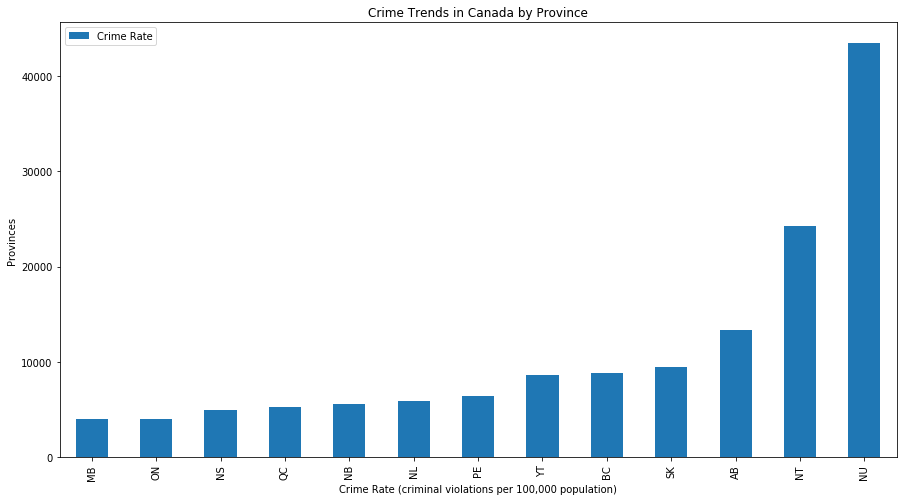

In [8]:
page3 = requests.get("https://en.wikipedia.org/wiki/Crime_in_Canada")

soup3 = BeautifulSoup(page3.content, 'html.parser')
crimeTables = soup3.findAll('table',{'class':'wikitable'})
crimeTable = crimeTables[1].findAll('td')

crimeData = []

for index, datum in enumerate(crimeTable):
    if index < 30:
        crimeData.append(datum.text)

crimeData = np.asarray(crimeData)
crimeData = crimeData.T
crime_df = pd.DataFrame()
province = crimeData[2:15:] 
crime_df['Province']=province
prov_crimes = crimeData[16:29:] 
crime_df['Crime Rate']=prov_crimes
crime_df = crime_df.replace('\n','', regex=True)

crime_df['Crime Rate'] = crime_df['Crime Rate'].replace(',','', regex=True)
crime_df["Crime Rate"] = pd.to_numeric(crime_df["Crime Rate"])
crime_df.set_index(crime_df['Province'],drop=True,inplace=True)
crime_df = crime_df.sort_values(['Crime Rate'],ascending = True)

crime_df.plot(kind='bar',figsize=(15,8)) # pass a tuple (x, y) size
plt.title('Crime Trends in Canada by Province')
plt.ylabel('Provinces')
plt.xlabel('Crime Rate (criminal violations per 100,000 population)')

plt.show()


### So, choosing Toronto as city of residence.

## Exploring Neighbourhoods and their location data

In [1]:
!wget -q -O 'toronto_crimes.csv' https://opendata.arcgis.com/datasets/98f7dde610b54b9081dfca80be453ac9_0.csv?outSR=%7B%22wkid%22%3A102100%2C%22latestWkid%22%3A3857%7D
tc_df = pd.read_csv('toronto_crimes.csv')
print("data downloaded")

tc_df= tc_df.filter(['Neighbourhood','Lat','Long'], axis=1)
tc_df['Neighbourhood'] = tc_df['Neighbourhood'].str.split(' \(', expand=True)
tc_df.head()

In [ ]:
nb_df = tc_df.groupby('Neighbourhood', sort=False).agg('count')
nb_df=nb_df.drop('Long',axis=1)
nb_df = nb_df.sort_values(['Lat'],ascending = True)
nb_df.head()

nb_df.plot(kind='bar',figsize=(25,8)) # pass a tuple (x, y) size
plt.title('Crime Rates in different neighbourhoods of Toronto')
plt.xlabel('Nieghbourhoods')
plt.ylabel('Crimes')
plt.show()

nb_df = nb_df.reset_index(0)
nb_df.head()
nb_df.columns = ['Neighbourhood','Crimes']

In [ ]:
######################################
# Data for Neighbourhoods in Toronto #
######################################


import pandas as pd
import numpy as np
import requests

page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

myTable = soup.find('table',{'class':'wikitable sortable'})
mydata = myTable.findAll('td')

tableData = []
for mydatum in mydata:
    tableData.append(mydatum.get_text())
    
myTable = np.array(tableData)
myTable = myTable.T

finalcodes = myTable[::3] 
df = pd.DataFrame()
df['Postal Codes']=finalcodes

finalboroughs = myTable[1::3] 
df['Boroughs']=finalboroughs

finalneighbourhoods = myTable[2::3] 
df['Neighbourhoods']=finalneighbourhoods

df =df[df['Boroughs'] != "Not assigned"]
df = df.replace('\n','', regex=True)

df['Neighbourhoods'] = np.where(df['Neighbourhoods'] == "Not assigned", df['Boroughs'], df['Neighbourhoods'])

df.columns = ['Codes','Boroughs','Neighbourhood']
#df = df.groupby('Codes', sort=False).agg( ', '.join).reset_index()
df.head()

!wget -q -O 'data.csv' https://cocl.us/Geospatial_data
print('Data downloaded!')

locationdf = pd.read_csv('data.csv')
locationdf.columns=['Codes','Latitude','Longitude']
locationdf.head()
locationdf.shape

newdf = pd.merge(df, locationdf, how='inner', on = 'Codes')
newdf.head(5)

In [ ]:
nb_df.head(10)

In [ ]:
myfinaldf = pd.merge(newdf, nb_df, how='inner', on = 'Neighbourhood')
myfinaldf = myfinaldf.sort_values(['Crimes'], ascending = True)

myfinaldf.plot(kind='bar',y='Crimes',x='Neighbourhood',figsize=(25,8)) # pass a tuple (x, y) size
plt.title('Crime Rates in different neighbourhoods of Toronto')
plt.xlabel('Nieghbourhoods')
plt.ylabel('Crimes')
plt.show()

In [ ]:
myfinaldf = myfinaldf[myfinaldf['Crimes']<1000]
myfinaldf.head()

In [ ]:
#!conda install -c conda-forge geocoder
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

chosenCity = original_df.loc[original_df['Community'] == 'Toronto']
lat = chosenCity['Latitude'].item()
long = chosenCity['Longitude'].item()
myMap = folium.Map(location=[lat, long], zoom_start=11)


# add markers to map
for i_lat, i_lng, borough, neighborhood in zip(myfinaldf['Latitude'], myfinaldf['Longitude'], myfinaldf['Boroughs'], myfinaldf['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [i_lat, i_lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(myMap)  


myMap

In [11]:
CLIENT_ID = 'S5ZO3SZCUEZOZ13PABQ1RFBTVA23ISJT3RZZVR5K3YAHLWK5' # your Foursquare ID
CLIENT_SECRET = '24JAXIJCRK5CHRELEKZCX4IFZFC5LB44FE3YH15VYPNZXA4E' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 50

Your credentails:
CLIENT_ID: S5ZO3SZCUEZOZ13PABQ1RFBTVA23ISJT3RZZVR5K3YAHLWK5
CLIENT_SECRET:24JAXIJCRK5CHRELEKZCX4IFZFC5LB44FE3YH15VYPNZXA4E


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
toronto_venues = getNearbyVenues(names=myfinaldf['Neighbourhood'],
                                   latitudes=myfinaldf['Latitude'],
                                   longitudes=myfinaldf['Longitude']
                                  )

toronto_venues.head()

In [9]:
toronto_venues.groupby('Neighborhood').count()

In [ ]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()


num_top_venues = 5 

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.head()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
     
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

### Depending on personal preferences, a Pakistani planning to immmigrate to Canada should choose one of the neighbourhoods above.